In [16]:
import os
import random
import time

import imageio
import numpy as np
from PIL import Image
from torch.utils import data
from torchvision.transforms import transforms
import math
import multiprocessing as mp
import matplotlib.pyplot as plt

from utils.generate_bg import merge_by_mask
from utils.helpers import resize_to_128
from utils import configs, datasets, card_generator as card_gen

In [2]:
face_pool = card_gen.get_face_pool()

In [6]:
card_generator = card_gen.get_card_generator(face_pool)
original_mask = card_gen.get_true_mask()

In [7]:
coords = datasets.get_orig_rectangle_coords(datasets.CARD_POSITION, datasets.CARD_SIZE)
mask = np.copy(original_mask)

# get coords

In [8]:
ratio = float(configs.IMAGE_SIZE) / mask.shape[0]
coords_128 = datasets.resize_coords(coords, ratio, mask.shape, with_canvas=True)

In [10]:
coords_128

array([[ 24.72380952,  39.54285714],
       [101.56190476,  39.54285714],
       [ 24.72380952,  87.92380952],
       [101.56190476,  87.92380952]])

# get mask

In [12]:
mask_128 = resize_to_128(mask)

In [14]:
mask_128.shape

(128, 128)

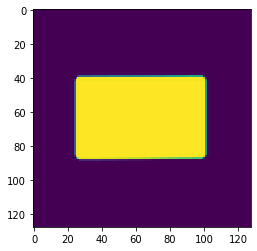

In [17]:
plt.imshow(mask_128);

In [20]:
def save_img(img_arr: np.array, filename):
    layers_map = {
        1: 'L',
        3: 'RGB',
        4: 'RGBA'
    }
    layer_count = img_arr.shape[2] if len(img_arr.shape) == 3 else 1
    image = Image.fromarray(img_arr.astype('uint8'), layers_map[layer_count])
    image.save(filename)

In [21]:
save_img(mask_128, 'data/mask_128.png')

# get a lot of cards

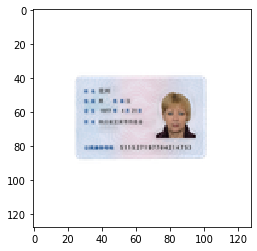

In [28]:
card = card_generator.__next__()
card_128 = resize_to_128(card)
plt.imshow(card_128);

In [29]:
len(face_pool)

267

In [30]:
def generate_card(index):
    card = card_generator.__next__()
    card_128 = resize_to_128(card)
    save_img(card_128, f'data/cards_pool/{index:0>4}.png')

In [31]:
# generate_card(321)

In [32]:
with mp.Pool(processes=mp.cpu_count()) as pool:
    pool.map(generate_card, list(range(len(face_pool) * 20)))